In [1]:
import pandas as pd
import lib

In [2]:
geosra_pd = pd.read_parquet('../data/raw/geo-sra-ecological.parquet.gzip')
print(geosra_pd.columns)

Index(['bioproject', 'acc', 'organism', 'assay_type', 'instrument',
       'librarylayout', 'libraryselection', 'librarysource',
       'geo_loc_name_country_calc', 'geo_loc_name_country_continent_calc',
       'mbytes', 'mbases', 'releasedate', 'collection_date', 'lat_lon_src',
       'lat_lon_raw', 'latitude', 'longitude', 'latitude_precision',
       'longitude_precision', 'has_latlon', 'rg_country_code', 'rg_city',
       'rg_country', 'gc_continent', 'gc_continent_code'],
      dtype='object')


#### Bioproject et Acc semblent être des clés primaires de la table

In [36]:
print(geosra_pd["bioproject"].head())

1836    SRR19309655
1932    SRR21912716
2497     ERR3494974
2503     SRR4419991
2637    SRR25180576
Name: bioproject, dtype: string


In [37]:
print(geosra_pd["acc"].head())

1836    SRR19309655
1932    SRR21912716
2497     ERR3494974
2503     SRR4419991
2637    SRR25180576
Name: acc, dtype: string


In [38]:
print(len(geosra_pd[geosra_pd["bioproject"] != geosra_pd["acc"]]))

0


#### Organism, Assay_type, Instrument, Library semblent être des attributs liés à la méthode et l'étude source

In [39]:
print(geosra_pd["organism"].head())

1836    wastewater metagenome
1932    wastewater metagenome
2497       biofilm metagenome
2503      seawater metagenome
2637      sediment metagenome
Name: organism, dtype: string


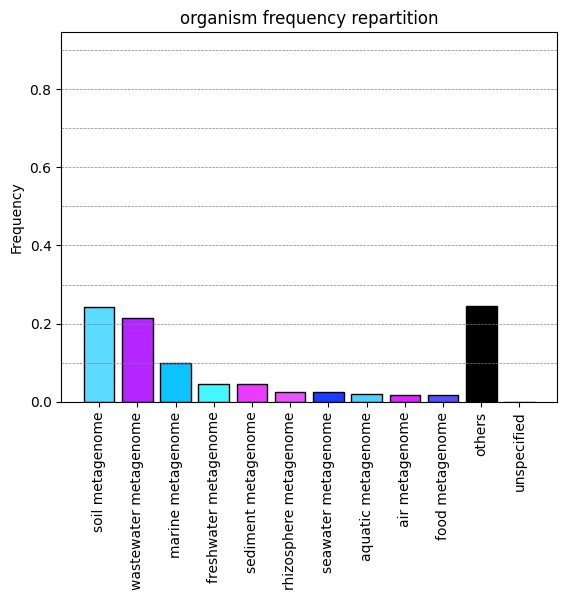

158


In [40]:
dict = lib.extract_infos(geosra_pd,"organism",N=10)
print(len(dict))

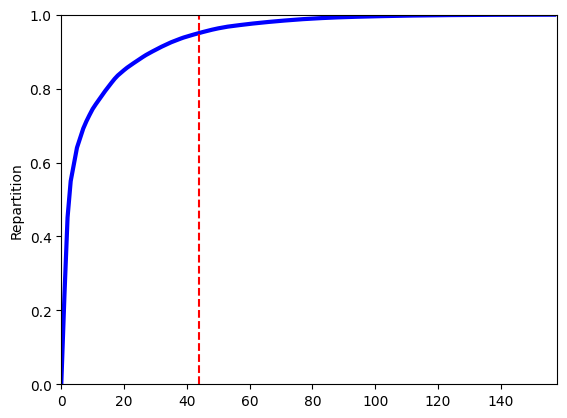

In [41]:
frep,thr = lib.repartition(dict)

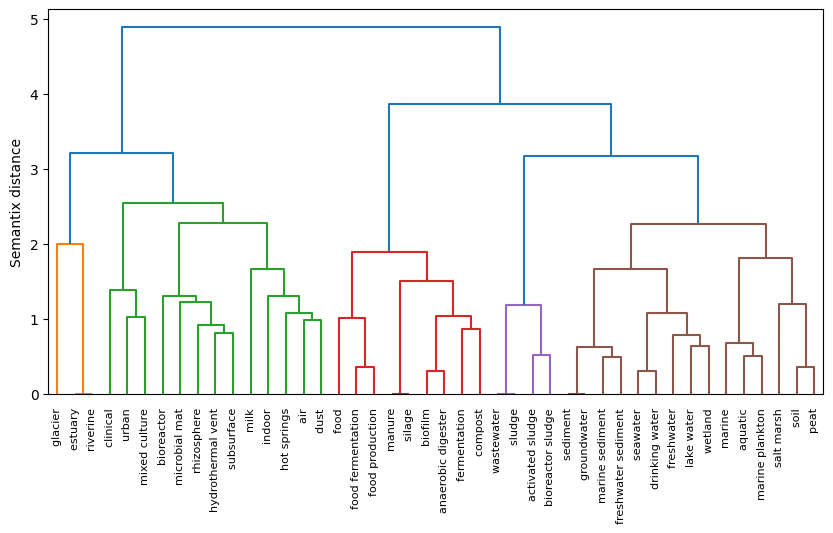

In [42]:
chains = list(dict.keys())[:thr]
chains = [chain.replace('metagenome', '') for chain in chains]
sem_den = lib.semantix_dendogram(chains, ct=1)

#### Quantititatives

In [3]:
print(geosra_pd["mbytes"].head())

1836     145.0
1932       3.0
2497     988.0
2503      65.0
2637    9787.0
Name: mbytes, dtype: float64


<AxesSubplot: >

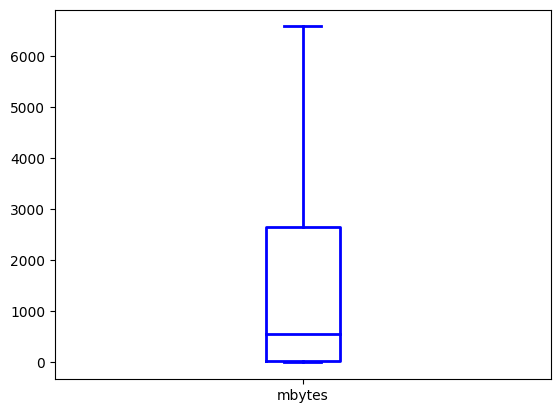

In [169]:
geosra_pd["mbytes"].plot(kind='box', showfliers=False,
                        boxprops = {'color':'blue', 'linewidth':2},
                        whiskerprops={'color': 'blue', 'linewidth': 2},
                        medianprops={'color': 'blue', 'linewidth': 2},
                        meanprops={'color': 'blue', 'marker': 'o', 'markersize': 10},
                        capprops={'color': 'blue', 'linewidth': 2}
                        )